# single layer reg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [4]:
X.shape

(442, 10)

In [5]:
y.shape

(442,)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [7]:
# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initialize the model (Single-Layer Perceptron)
model_slp = Sequential()
model_slp.add(Dense(1, input_dim=X_train.shape[1])) # Output layer with 1 neuron

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model_slp.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train the model
history_slp = model_slp.fit(X_train_scaled, y_train, epochs=100,
                            batch_size=32,
                            validation_data=(X_test_scaled, y_test),
                            verbose=1);

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 29851.6309 - val_loss: 28799.3594
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28575.9141 - val_loss: 28792.2773
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29741.6504 - val_loss: 28785.7734
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30109.8457 - val_loss: 28779.6777
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28943.1699 - val_loss: 28774.2637
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27760.3926 - val_loss: 28769.0645
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28619.3359 - val_loss: 28763.7383
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29933.8711 - val_loss: 28758.1270
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 30205.6387 - val_loss: 28752.4355
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28724.9766 - val_loss: 28746.2617
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2746

In [11]:
model_slp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (144.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24 (100.00 B)

In [12]:
# Evaluate the model
loss_slp = model_slp.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error (SLP): {loss_slp}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28817.3789
Mean Squared Error (SLP): 28220.44140625


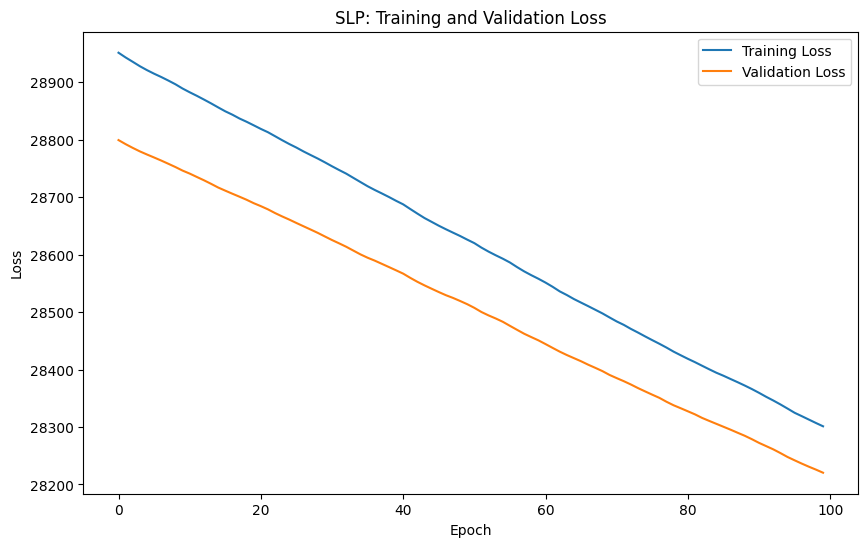

In [13]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history_slp.history['loss'], label='Training Loss')
plt.plot(history_slp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SLP: Training and Validation Loss')
plt.legend()
plt.show()

# multi layer regm

In [14]:
# Initialize the model (Multi-Layer Perceptron)
model_mlp = Sequential()

In [15]:
model_mlp.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(50, activation='relu'))
model_mlp.add(Dense(1)) # Output layer with 1 neuron
# model_dnn_reg.add(Dense(1, activation='linear')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model_mlp.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model
history_mlp = model_mlp.fit(X_train_scaled, y_train, epochs=100, batch_size=32,validation_data=(X_test_scaled, y_test), verbose=0)

In [17]:
model_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,151 (12.31 KB)

 Trainable params: 3,151 (12.31 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Evaluate the model
loss_mlp = model_mlp.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error (MLP): {loss_mlp}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3518.7041
Mean Squared Error (MLP): 3464.86083984375


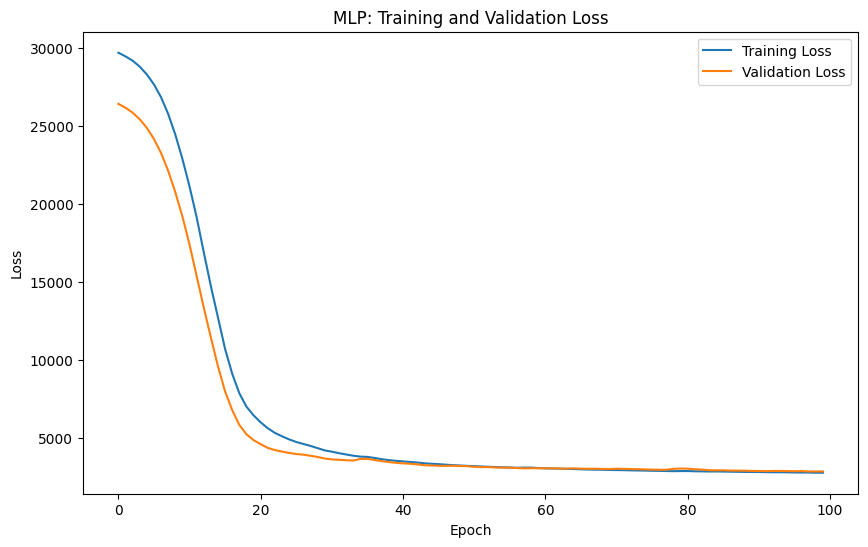

In [ ]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP: Training and Validation Loss')
plt.legend()
plt.show()

# Single Layer Classification

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert target labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# Initialize the model (Single-Layer Perceptron)
model_slp_clf = Sequential()
model_slp_clf.add(Dense(3, activation='softmax', input_dim=X_train.shape[1]))
# Output layer with 3 neurons (for 3 classes)

/home/aditya/GEN_AI_GOOGLE_NEW/venv_google_langchain_new/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_slp_clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history_slp_clf = model_slp_clf.fit(X_train_scaled, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_cat), verbose=0)

In [ ]:
# Evaluate the model
loss_slp_clf, accuracy_slp_clf = model_slp_clf.evaluate(X_test_scaled,y_test_cat)
print(f"Accuracy (SLP): {accuracy_slp_clf}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9333 - loss: 0.4782
Accuracy (SLP): 0.9333333373069763


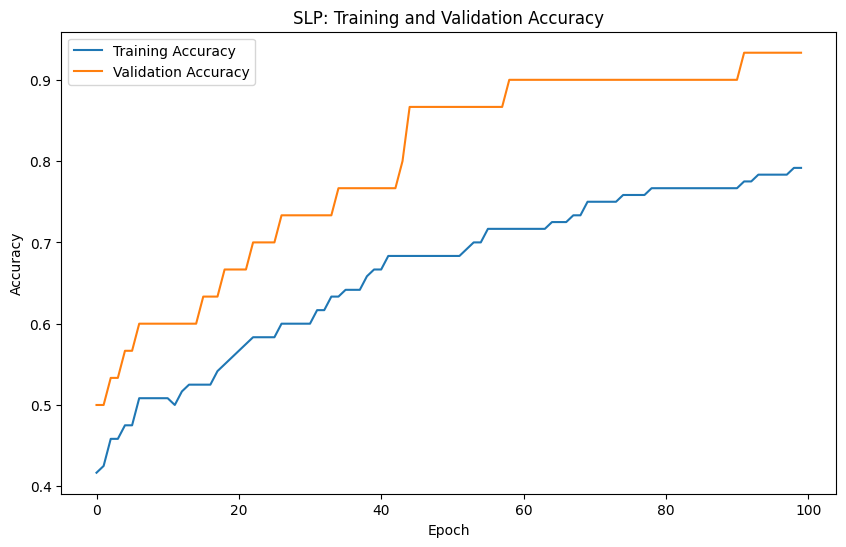

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_slp_clf.history['accuracy'], label='Training Accuracy')
plt.plot(history_slp_clf.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SLP: Training and Validation Accuracy')
plt.legend()
plt.show()

# Multi layer classifier

In [ ]:
# Initialize the model (Multi-Layer Perceptron)
model_mlp_clf = Sequential()
model_mlp_clf.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
model_mlp_clf.add(Dense(50, activation='relu'))
model_mlp_clf.add(Dense(3, activation='softmax')) # Output layer with 3 neurons (for 3 classes)

In [ ]:
# Compile the model

model_mlp_clf.compile(optimizer='adam', loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
# Train the model
history_mlp_clf = model_mlp_clf.fit(X_train_scaled, y_train_cat, epochs=100,
                                    batch_size=32,
                                    validation_data=(X_test_scaled, y_test_cat), verbose=0)

In [ ]:
# Evaluate the model
loss_mlp_clf, accuracy_mlp_clf = model_mlp_clf.evaluate(X_test_scaled,
                                                        y_test_cat)
print(f"Accuracy (MLP): {accuracy_mlp_clf}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.0269
Accuracy (MLP): 1.0


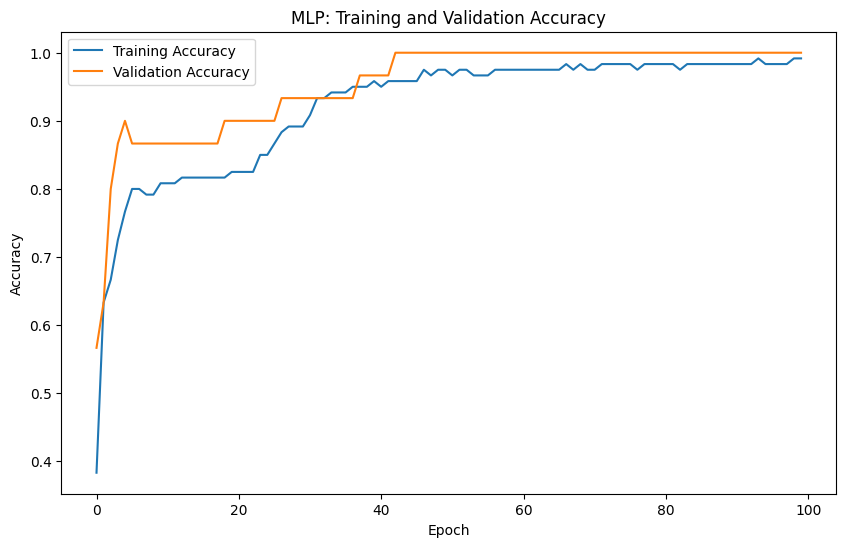

In [ ]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history_mlp_clf.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp_clf.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MLP: Training and Validation Accuracy')
plt.legend()
plt.show()

# Early stopping

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert target labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Initialize the model (Deep Neural Network)
model_dnn_clf = Sequential()
model_dnn_clf.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_dnn_clf.add(Dense(50, activation='relu'))
model_dnn_clf.add(Dense(3, activation='softmax')) # Output layer with 3 neurons (for 3 classes)
# Compile the model
model_dnn_clf.compile(optimizer='adam', loss='categorical_crossentropy',
                      metrics=['accuracy'])

/home/aditya/GEN_AI_GOOGLE_NEW/venv_google_langchain_new/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                               restore_best_weights=True)

In [ ]:
# Train the model with early stopping
history_dnn_clf = model_dnn_clf.fit(X_train_scaled, y_train_cat, epochs=100,
                                    batch_size=32, validation_data=(X_test_scaled, y_test_cat), callbacks=[early_stopping],verbose=0)

In [ ]:
# Evaluate the model
loss_dnn_clf, accuracy_dnn_clf = model_dnn_clf.evaluate(X_test_scaled,
                                                        y_test_cat)
print(f"Accuracy (DNN - Classification): {accuracy_dnn_clf}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0193
Accuracy (DNN - Classification): 1.0


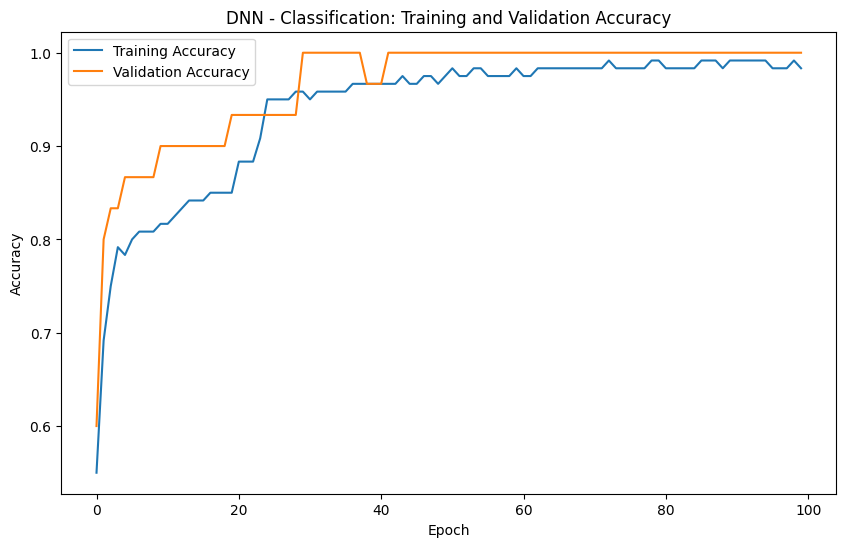

In [ ]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history_dnn_clf.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn_clf.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('DNN - Classification: Training and Validation Accuracy')
plt.legend()
plt.show()

# Binary class

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model (Multi-layer Neural Network for Binary Classification)
model_dnn_clf = Sequential()
model_dnn_clf.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_dnn_clf.add(Dense(50, activation='relu'))
model_dnn_clf.add(Dense(1, activation='linear')) # Output layer with linear activation for binary classification
# Compile the model
model_dnn_clf.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])

/home/aditya/GEN_AI_GOOGLE_NEW/venv_google_langchain_new/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history_dnn_clf = model_dnn_clf.fit(X_train_scaled, y_train, epochs=50,
                                    batch_size=32,validation_data=(X_test_scaled, y_test),
                                    verbose=0)

In [ ]:
# Evaluate the model
loss_dnn_clf, accuracy_dnn_clf = model_dnn_clf.evaluate(X_test_scaled, y_test)
print(f"Loss (Binary Crossentropy): {loss_dnn_clf}")
print(f"Accuracy (DNN - Binary Classification): {accuracy_dnn_clf}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.1572 
Loss (Binary Crossentropy): 0.15718050301074982
Accuracy (DNN - Binary Classification): 0.9824561476707458


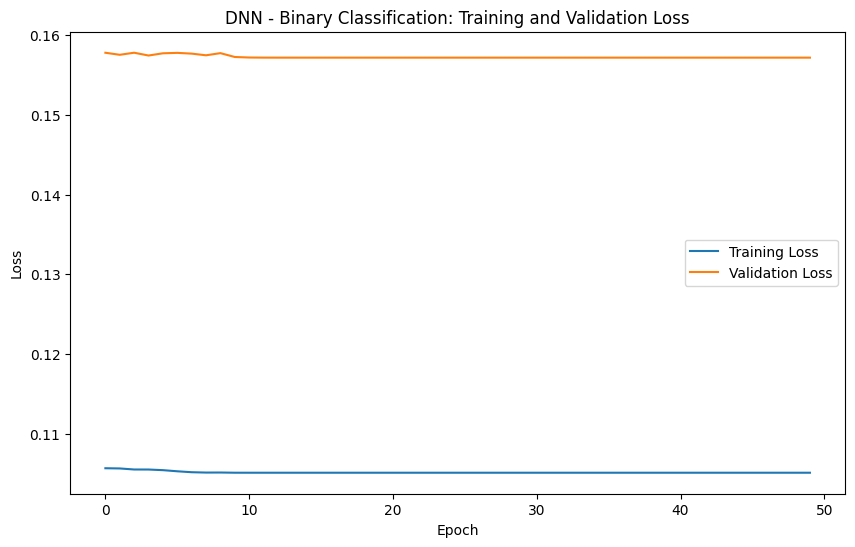

In [ ]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history_dnn_clf.history['loss'], label='Training Loss')
plt.plot(history_dnn_clf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DNN - Binary Classification: Training and Validation Loss')
plt.legend()
plt.show()